<a href="https://colab.research.google.com/github/VladTeapa/Python/blob/master/Lab3_Reducerea_numarului_de_culori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reducerea numarului de culori
In acest laborator se vor studia cativa algoritmi de reducere a numarului de culori. Numarul de culori dintr-o imagine are un impact semnificativ asupra memoriei necesare pentru reprezentarea imaginii respective. Vizual, o imagine poate fi reprezentata in mai putine culori fara a schimba drastic calitatea acesteia. Plecand de la aceasta idee in acest laborator se vor studia si modalitati analitice prin care putem compara doua imagini. Incepem prin a importa librariile necesare.

In [0]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from collections import Counter 
from itertools import chain



##Cuantificarea unifroma
Dupa cum a fost explicat in laboratorul trecut, spatiul culorilor poate fi vizualizat ca un spatiu tridimensional in care fiecare punct are culoarea definita de coordonatele sale. Acest spatiu (cub) poate fi vizualizat mai jos.

![Cubul RGB](https://www.mathworks.com/help/images/color7.gif)

Ideea cuantificarii uniforme consta in impartirea acestui cub in cubulete egale si restrangerea numarului total de culori ($256^3$) la numarul de cubuletele. Toate culorile care apartin unui cubulet vor fi inlocuite cu o culoare reprezentativa a cubuletului respectiv.


 Sa consideram urmatorul sir de numere:

 $0,1,2,3,4,5,6,7,8,9,10,11$

 Se doreste cuantificarea uniforma a acestui sir pe 3 nivele:

 $0,1,2,3 | 4,5,6,7 | 8,9,10,11$

Cu alte cuvinte, fiecare valoare din primul interval ($0,1,2,3$) va lua valoarea 0, fiecare valoarea din al doilea interval ($4,5,6,7$) va lua valoarea 4 iar fiecare vloarea din al treilea interval ($8,9,10,11$) va lua valoarea 8. 

Matematic, daca $x$ este o valoare din interval atunci dupa cuantificare $x = x\left[\frac{N}{T}\right]\frac{T}{N}$, unde $N$ este numarul de nivelele iar $T$ numarul total de valori.

Mai jos se citeste imaginea de test, Lenna color.

In [12]:
!curl -o Lenna.bmp https://raw.githubusercontent.com/miiip/MultimediaLabs/master/peppers.bmp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  768k  100  768k    0     0  2306k      0 --:--:-- --:--:-- --:--:-- 2299k


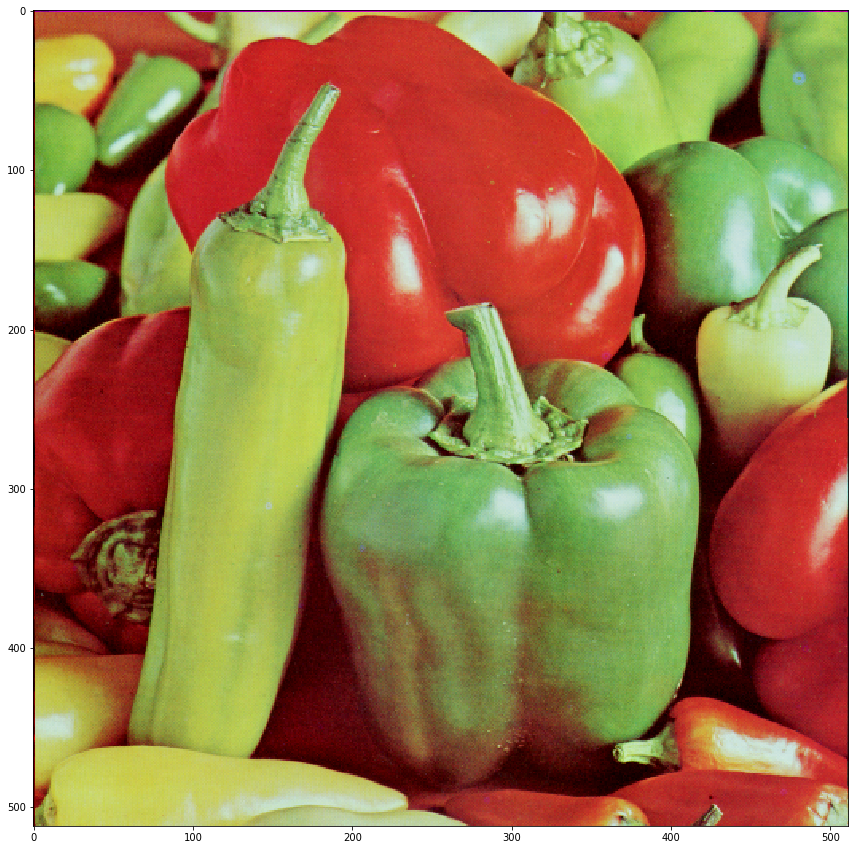

In [13]:
plt.gcf().set_size_inches(15, 15)
img = cv2.imread('Lenna.bmp', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Pentru a reduce numarul de culori folosind cuantificarea uniforma se foloseste ideea de mai sus. Fiecare dintre cele 3 canale (R, G si B) sunt reduse la N nivele prin urmare numarul total de culori este $N^3$.

(512, 512, 3)


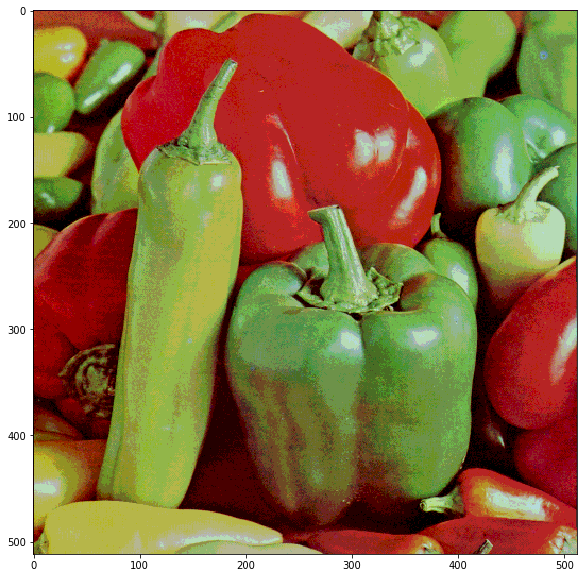

In [22]:
plt.gcf().set_size_inches(10, 10)
print(img.shape)
N=7
imgR = np.uint8(np.floor(img*(N/256))*(256/N))
plt.imshow(imgR)

Pentru a vizualia culorile in spatiul tridimensional se procedeaza dupa cum urmeaza:

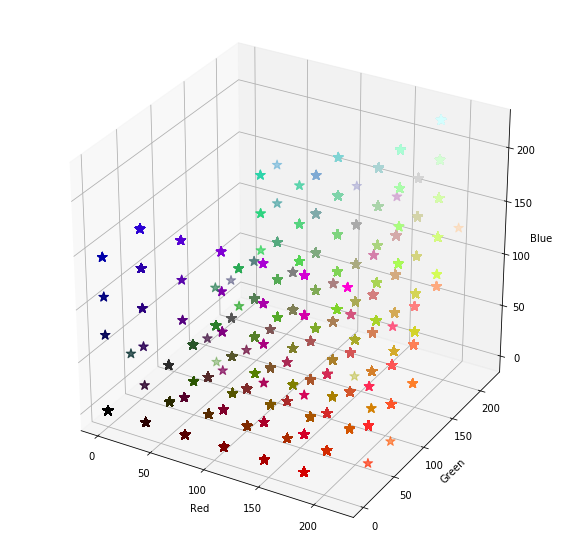

In [23]:
imgP = imgR.copy()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
r, g, b = cv2.split(imgP)
lenna_colors = imgP.reshape((np.shape(imgP)[0]*np.shape(imgP)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(lenna_colors)
lenna_colors = norm(lenna_colors).tolist()
ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=lenna_colors, marker="*", s = 100)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

Observatie: numarul **maxim** de culori dupa reducere este $N^3$ insa nu este obligatoriu ca acesta sa fie atins. In functie de culorile din imaginea originala, acesta poate fi mai mic decat $N^3$. De ce? 

Pentru a determina numarul final de culori se foloseste un *Counter*. Acesta modeleaza o multie de puncte, ceea ce inseamna ca duplicatele vor fi ignorate.

In [24]:
set_lenna_colors = Counter([tuple(i) for i in lenna_colors]) 
print(len(set_lenna_colors))

149


**TODO:** Experimentati cu parametrul N. Cate culori sunt necesare pentru ca, din punct de vedere vizual, calitatea sa fie considerata satisfacatoare? Afisati spatiul culorilor pentru fiecare $N$

##Compararea a doua imagini
Pana la acest moment, compararea a doua imagini s-a facut doar vizual. In aceasta parte a laboratorului se va introduce o metrica cu ajutorul careia se va stabili cat de asemanatoare sunt doua imagini. Aceasta metrica se numeste PSNR si se calculeaza dupa formula: $PSNR(I,J)=10log\left(\frac{R^2}{MSE}\right)$ unde $R$ reprezinta diferenta dintre valoarea maximă şi valoarea minimă a unui pixel. In OpenCV puteti folosi functia *PSNR* ca in exemplul urmator.



In [25]:
print('PSNR intre imaginea originala si cea in care am redus numarul de culori este ', cv2.PSNR(img, imgR))

PSNR intre imaginea originala si cea in care am redus numarul de culori este  21.959396776169406


**TODO:** Plotati PSNR intre imgR (imaginea cu numar redus de culori) si img (imaginea originala) in functie de $N$ (numarul final de culori)

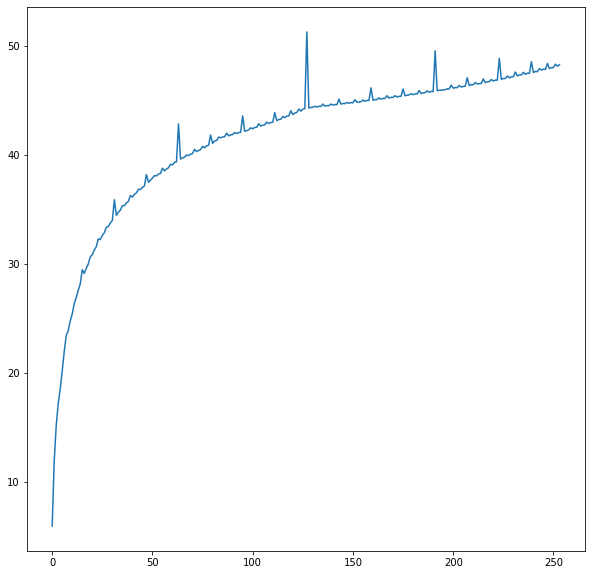

In [28]:
list = []
for i in range(1,255):
  plt.gcf().set_size_inches(10, 10)
  N=i
  imgR = np.uint8(np.floor(img*(N/256))*(256/N))
  list.append(cv2.PSNR(img,imgR))
plt.plot(list)
plt.show()

Dublu-click __aici__ pentru solutie.

<!-- Your answer is below:
    
plt.gcf().set_size_inches(10, 10)
N = np.arange(1, 256, 1)
imgReduce = np.asanyarray([np.uint8(np.floor(img*(n/256))*(256/n)) for n in N])
psnrs = np.asanyarray([cv2.PSNR(imgR, img) for imgR in imgReduce])
plt.plot(N, psnrs)


-->

##Colormap
O imagine in tonuri de gri se reprezinta ca o matrice de numere intregi cu valori intre 0 si 255. Pentru a ajunge de la aceasta reprezentare logica la ceea ce se vede efectiv in poze se foloseste colormap. Colormap-urile sunt functii care asociaza fiecarui numar real cuprins intre 0 si 1 un grup de 4 numere reale cuprinse intre 0 si 1. Primele 3 numere reale reprezinta intensitatiile RGB iar al patrulea factorul de transparenta al imaginii. Deoarece colormap-urile lucreaza cu numere intre 0 si 1, inainte de a le folosi imaginea se normalizeaza prin impartirea la 255. Matplotlib dispune de un numar mare de colormap-uri predefinite. Cateva dintre aceste palete de culor (colormap-uri) sunt afisate mai jos.

![Palete de culori predefinite](https://scipy-cookbook.readthedocs.io/_downloads/colormaps3.png)

Pentru a accesa valorile dintr-o anumita paleta de culori se foloseste functia *get_cmaps* din libraria matplotlib. Acest lucru este ilustrat in cod mai jos:

In [58]:
viridis = cm.get_cmap('plasma', 12)
print(viridis.colors.shape)

(12, 4)


In apelul functiei precedente am specificat numele paletei (viridis) si numarul de culori pe care dorim sa-l extragem. Din paleta de culori *viridis* au fost extrase doar 12 culori. Aceasta este o matrice de 12x4 (12 culori, fiecare culoare reprezentata de 4 numere reale intre 0 si 1). Pentru a afisa cele 12 culori se procedeaza ca mai jos:

In [44]:
print(viridis.colors)

[[0.050383 0.029803 0.527975 1.      ]
 [0.241396 0.014979 0.610259 1.      ]
 [0.387183 0.001434 0.654177 1.      ]
 [0.523633 0.024532 0.652901 1.      ]
 [0.650746 0.125309 0.595617 1.      ]
 [0.752312 0.227133 0.513149 1.      ]
 [0.836801 0.329105 0.430905 1.      ]
 [0.907365 0.434524 0.35297  1.      ]
 [0.963203 0.553865 0.271909 1.      ]
 [0.991985 0.681179 0.195295 1.      ]
 [0.986509 0.822401 0.143557 1.      ]
 [0.940015 0.975158 0.131326 1.      ]]


Pentru a determina spre ce valori este mapat un numar intre 0 si 1 se apeleaza simplu *viridis(numar)*

In [48]:
print(viridis(0.56))

(0.836801, 0.329105, 0.430905, 1.0)


Valoarea 0.56 este mapata catre (0.119512, 0.607464, 0.540218, 1.0). Cu alte cuvinte, daca intr-o imagine in tonuri de gri, un element din matricea care reprezinta imaginea are valoarea 0.56, atunci intensitatea luminoasa de rosu a pixelului respectiv va fi 0.119512, intensitatea de verde va fi 0.60746 iar intensitatea de albastru 0.540218. 

##Mai multe despre plt.imshow
Dupa cum ati observat pana acum, cand se afiseaza o imagine folosind functia *plt.imshow* se specifica, pe langa imaginea ce trebuie afisata, si argumentul *cmap*. Acest argument indica colormap-ul utilizat in afisarea imaginii. Daca imaginea este in format RGB acest argument este ignorat. Daca imginea este insa in tonuri de gri acest argument va fi folosit la afisare. Mai multe [aici](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html). Colormap-ul utilizat default cand acesta nu este specificat este viridis. Daca incercati sa afisati o imagine in tonuri de gri fara a specifica argumentul *cmap* aceasta va fi afisata color. Acest lucru se datoreaza colormap-ului **viridis** folosit default. Pentru a afisa imaginea in tonuri de gri, se specifica *cmap='gray'*.

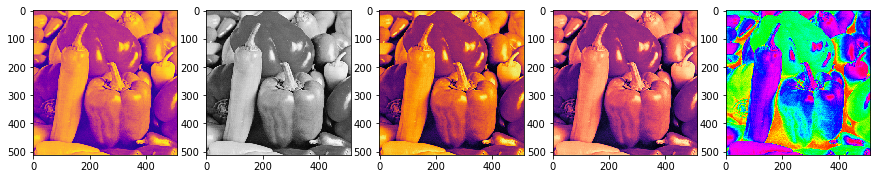

In [59]:
plt.gcf().set_size_inches(15, 15)
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 5, 1)
plt.imshow(imgGray, cmap='plasma')
plt.subplot(1, 5, 2)
plt.imshow(imgGray, cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(imgGray, cmap='inferno')
plt.subplot(1, 5, 4)
plt.imshow(imgGray, cmap='magma')
plt.subplot(1, 5, 5)
plt.imshow(imgGray, cmap='hsv')



**TODO:** Afisati imaginea de mai sus folosind diverse colormap-uri.
![Ccolormap-uri](https://matplotlib.org/_images/sphx_glr_colormaps_001.png)

##Reducerea numarului de culori folosind colormap-uri
O alta strategie pentru reducerea numarului de culori o reprezinta folosirea unui colormap. Intuitiv, daca imaginea este color, aceeasta va fi convertita in tonuri de gri. Se va genera apoi un colormap cu numarul de culori la care dorim sa reducem imaginea initiala. Fiecare ton de gri va fi mapat catre o culoare din paleta. 

**TODO:** Implementati ideea de mai sus

##Determinarea celor mai importante culori
Pentru a reduce numarul de culori adaptiv (in functie de imagine) se poate genera un colormap in baza celor mai importante culori dintr-o imagine. Cu alte cuvinte, nu se va mai folosi o paleta de culori standard ci una specifica imaginii pentru care se doreste reducerea numarului de culori. Algorimul este urmarorul:


1.   Se imparte cubul RGB in cubulete de latura $l$ dupa cum a fost aratat la cunatificarea uniforma
2.   Se parcurge imaginea si pentru fiecare culoare (triplet rgb) este incrementat un counter specific cubuletului din care face parte acea culoare
3.   Se sorteaza crescator cubuletele in functie de numarul de culori din imagine gasite in fiecare dintre acestea
4.   Se aleg cele mai importante culori ca fiind cele date de centrele primelor $N$ cubulete, unde $N$ este numarul de culori la care se doreste sa se reduca imaginea 



Pentru a crea un colormap pornind de la o lista de culori se foloseste functia *colors.ListedColormap* . Primul argument al functiei este o matrice Nx3 reprezetand culorile pentru care se creaza paleta. Al doilea argument reprezinta numele paletei iar al treilea numarul de culori prezente in paleta. In exemplul de mai jos se creaza o paleta de culori pornind de la o imagine. 

In [0]:
imgColors = img.copy()
imgColors.resize((img.shape[0]*img.shape[1], 3))
imgColors = np.unique(imgColors, axis=0)
print(imgColors)
cmapp = colors.ListedColormap(imgColors, 'mycmap', 10)
print(cmapp.colors)

[[ 54   4  62]
 [ 56   4  60]
 [ 57   7  63]
 ...
 [255 228 181]
 [255 229 175]
 [255 242 206]]
[array([54,  4, 62], dtype=uint8), array([56,  4, 60], dtype=uint8), array([57,  7, 63], dtype=uint8), array([58, 11, 62], dtype=uint8), array([59,  3, 55], dtype=uint8), array([59,  4, 43], dtype=uint8), array([59,  6, 68], dtype=uint8), array([59,  7, 58], dtype=uint8), array([59,  9, 59], dtype=uint8), array([59, 10, 59], dtype=uint8)]


**TODO:** Implementati algoritmul de mai sus

##Algoritmu median cut
Ideea algoritmului consta in generarea unei palete de culori specifica unei imagini prin segmentarea culorilor dupa canalul (rosu, verde sau albastru) cu cel mai mare range.


1.   Se determina canalul cu cel mai mare range (diferenta intre cea mai mica si cea mai mare valoare este maxima) 
2.   Se sorteaza culorile din imagine dupa canalul determinat anterior: daca albastru are cea mai mare dispersie atunci (1, 250, 250) < (10, 1, 1)
3.   Se imparte vectorul sortat in doi alti vectori si se revine la pasul 1 cu fiecare dintre acestia.

Se observa ca la fiecare pas algoritmul genereaza 2 vectori de culori, prin urmare numarrul final de vectori obtinuti este $2^n$ unde $n$ este numarul de rulari ale algoritmului.

Daca se doreste crearea unei palete de $2^n$ culori atunci algoritmul va fi rulat de $n$ ori. Pentru a transforma cei $n$ vectori finali in $n$ culori, se va calcula media aritmetica a valorilor pentru fiecare dintre acestia.



**TODO:**Implementati algoritmul median cut, creati un colormap si reduceti numarul de culori din imaginea de lucru dupa cum a fost procedat mai sus. Experimentati mai multe valori ale parametrului $n$ din algoritm. 